# Arquivo criado para classificar base de dados com foco na profissão do investidor

## Instalacao bibliotecas necessarias

In [1]:
# !pip install catboost
# !pip install xgboost

## 1. Extracao da base de dados

In [1]:
# Imports e leitura
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [30]:
df_principal = pd.read_parquet("./data/to_classify/sample_data.parquet")

In [31]:
df_principal

,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Pais do Investidor,Situacao da Conta,Operou 12 Meses,Faixa Etária,Grupo_Profissao,Macrogrupo_Profissao,IDH-M 2021
0,30/06/2023,Solteiro(a),M,OUTROS,28,RS,SANTA ROSA,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros,0.771
1,04/05/2022,Desquitado(a),F,OUTROS,28,SP,OSASCO,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros,0.806
2,28/09/2017,Solteiro(a),F,OUTROS,35,BA,SALVADOR,BRASIL,D,N,Adulto 30 - 59,Outros,Outros,0.691
3,16/01/2023,Desquitado(a),M,OUTROS,55,SP,JACAREI,BRASIL,D,N,Adulto 30 - 59,Outros,Outros,0.806
4,19/06/2023,Solteiro(a),M,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS,24,SP,ITAQUAQUECETUBA,BRASIL,A,N,Adulto jovem 18 - 29,Serviços Gerais,Serviços Gerais e Técnicos,0.806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,21/11/2022,Solteiro(a),M,ADMINISTRADOR,30,SP,MOGI DAS CRUZES,BRASIL,A,N,Adulto 30 - 59,Administração e Negócios,"Economia, Negócios e Administração",0.806
99996,23/08/2021,Solteiro(a),M,OUTROS,25,MG,SANTA LUZIA,BRASIL,A,N,Adulto jovem 18 - 29,Outros,Outros,0.774
99997,06/12/2021,Desquitado(a),M,APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO),60,RJ,RIO DE JANEIRO,BRASIL,A,N,Idoso >= 60,Aposentados e Pensionistas,Saúde e Bem-estar,0.762
99998,19/04/2022,Solteiro(a),M,PENSIONISTA,21,RJ,RIO DE JANEIRO,BRASIL,A,N,Adulto jovem 18 - 29,Aposentados e Pensionistas,Saúde e Bem-estar,0.762


In [32]:
df_principal['UF_Macrogrupo'] = df_principal['Macrogrupo_Profissao'].astype(str) + ' - ' + df_principal['UF do Investidor'].astype(str)

In [33]:
df = df_principal.drop(columns=["Profissao", "Pais do Investidor","Macrogrupo_Profissao", "UF do Investidor", "Operou 12 Meses", "Situacao da Conta", "Grupo_Profissao","Cidade do Investidor","Idade"])
df

,Data de Adesao,Estado Civil,Genero,Faixa Etária,IDH-M 2021,UF_Macrogrupo
0,30/06/2023,Solteiro(a),M,Adulto jovem 18 - 29,0.771,Outros - RS
1,04/05/2022,Desquitado(a),F,Adulto jovem 18 - 29,0.806,Outros - SP
2,28/09/2017,Solteiro(a),F,Adulto 30 - 59,0.691,Outros - BA
3,16/01/2023,Desquitado(a),M,Adulto 30 - 59,0.806,Outros - SP
4,19/06/2023,Solteiro(a),M,Adulto jovem 18 - 29,0.806,Serviços Gerais e Técnicos - SP
...,...,...,...,...,...,...
99995,21/11/2022,Solteiro(a),M,Adulto 30 - 59,0.806,"Economia, Negócios e Administração - SP"
99996,23/08/2021,Solteiro(a),M,Adulto jovem 18 - 29,0.774,Outros - MG
99997,06/12/2021,Desquitado(a),M,Idoso >= 60,0.762,Saúde e Bem-estar - RJ
99998,19/04/2022,Solteiro(a),M,Adulto jovem 18 - 29,0.762,Saúde e Bem-estar - RJ


## 2. Transformacao dos dados

In [34]:
# Encoding de variáveis categóricas (transformado em numeros inteiros)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['UF_Macrogrupo'])
y = df['UF_Macrogrupo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% Treino e 30%Teste

## 3. Treinamento e analise de modelos

### 3.1 Treinamento

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Treinamento com arvore de decisao finalizado")
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))

# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Treinamento com arvore de decisao aleatoria finalizado")
print("Acurácia Random Forest:", accuracy_score(y_test, pred_rf))

Treinamento com arvore de decisao finalizado
Acurácia Decision Tree: 0.20703333333333335
Treinamento com arvore de decisao aleatoria finalizado
Acurácia Random Forest: 0.17126666666666668


## Analise de modelos

/tmp/ipykernel_428235/3141359154.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


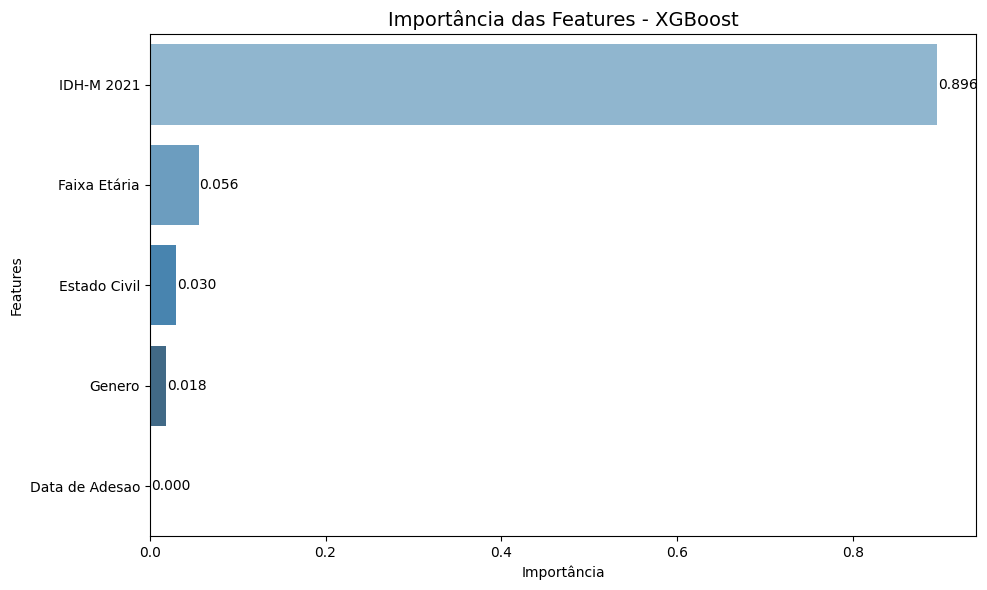

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importância das características
importances = rf.feature_importances_
features = X.columns

# Cria um DataFrame ordenado
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importance,
    palette='Blues_d'
)

plt.title('Importância das Features - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Features')

# Adicionando os valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 0.001,                # posição X
        p.get_y() + p.get_height() / 2, # posição Y centralizado na barra
        f'{width:.3f}',                # valor formatado com 3 casas decimais
        va='center'
    )

plt.tight_layout()
plt.show()


## Z - TESTES Com codigo original

In [ ]:
df = pd.read_parquet("./data/to_classify/sample_data_cluster.parquet") 

In [48]:
# Encoding de variáveis categóricas (transformado em numeros inteiros)
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop(columns=['Operou 12 Meses'])
y = df['Operou 12 Meses']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% Treino e 30%Teste

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print("Treinamento com arvore de decisao finalizado")

# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=3)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Treinamento com arvore de decisao aleatoria finalizado")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',n_estimators=100,max_depth=3,learning_rate=0.2, tree_method='gpu_hist')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("Treinamento com XGBOOST finalizado")

# CatBoost
# cb = CatBoostClassifier(verbose=0, task_type="GPU")
# cb.fit(X_train, y_train)
# pred_cb = cb.predict(X_test)
# print("Treinamento com CATBOOST finalizado")

# Avaliação
print("Acurácia Decision Tree:", accuracy_score(y_test, pred_dt))
print("Acurácia Random Forest:", accuracy_score(y_test, pred_rf))
print("Acurácia XGBoost:", accuracy_score(y_test, pred_xgb))
# print("Acurácia CatBoost:", accuracy_score(y_test, pred_cb))

#Será que 90% é bom? Vamos analisar com mais detalhes os resultados a seguir.

Treinamento com arvore de decisao finalizado
Treinamento com arvore de decisao aleatoria finalizado


/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:52:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [15:52:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Treinamento com XGBOOST finalizado
Acurácia Decision Tree: 0.9303977137262257
Acurácia Random Forest: 0.9303977137262257
Acurácia XGBoost: 0.9303977137262257


/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [15:52:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


/tmp/ipykernel_2113303/510692250.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<module 'matplotlib.pyplot' from '/home/fbrodrigues@FAZENDA.MS/teste/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

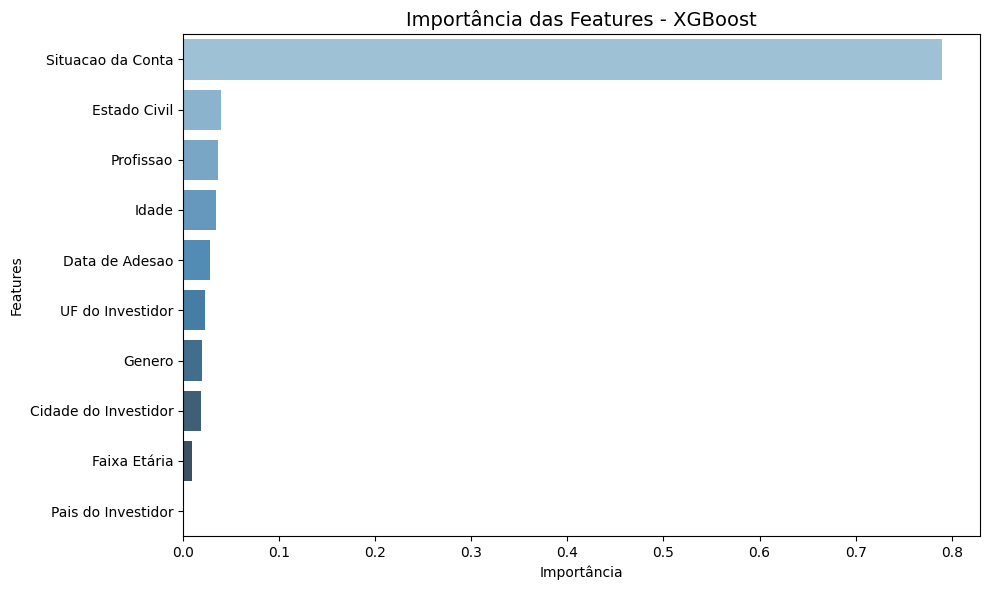

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importância das características - XGBoost (você colocou 'Random Forest' no título, mas está usando xgb)
importances = xgb.feature_importances_
features = X.columns

# Cria um DataFrame para facilitar a ordenação
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Ordena de maior para menor
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=df_importance,
    palette='Blues_d'
)
plt.title('Importância das Features - XGBoost', fontsize=14)
plt.xlabel('Importância')
plt.ylabel('Features')
plt.tight_layout()
plt
